# Ground Penetrating Radar Widget

Ground Penetrating Radar (GPR) uses electromagnetic (EM) energy. We emit EM signals using a source antenna and receive signals from the earth using a receiver antenna, like your cell phone. Physically, the source antenna generates EM wave and it propgates throuth the earth. Prior to considering how to process or interpret data, we need to identify how this EM wave propates in the earth.

Using this GPR widget, you will:
- Step 1: Visualize GPR wave propagation
- Step 2: Find a layered earth model that fits a clean common shot gather
- Step 3: Find a layered earth model that fits CMP data
- Step 4: Find parameters desribing a pipe and slab in a CMP profile data set 

The data you will examine in steps 2-4 were collected near UBC

## Step 0: Import Necessary Packages

In [1]:
%matplotlib inline
from GPRimport import *
from AttenuationImport import *

## Step 1: Synthetic data fitting App 

We provide below measured EM signals at receiver locations for a model similar to the one presented at Figure 1 in the lab instructions. 

The problem here is that you do not know material properties of three layer model (air, layer 1, and layer 2). In this step, you will estimate the geologic model corresponding to the measured data by adjusting given parameters.

Parameters given here:
- epsrL: relative permittivity for a linear arrival (direct or refracted wave)
- epsrH: relative permittivity for a hyperbolic arrival (reflection)
- tinterpL: intercept time for a linear arrival (direct or refracted wave)
- tinterpH: intercept time for a hyperbolic arrival (reflection)

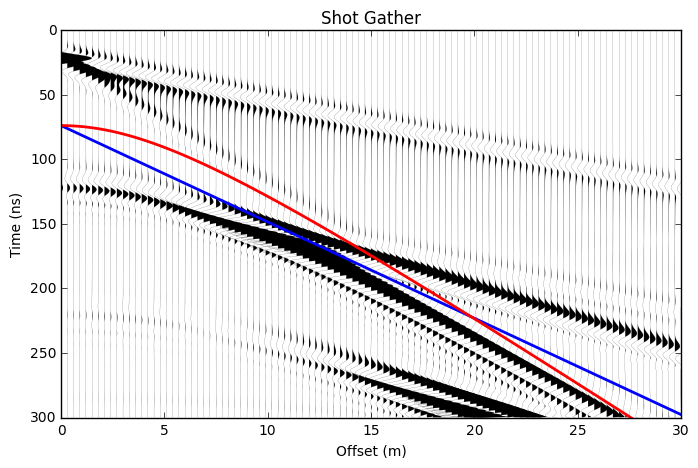

In [2]:
i = interact(PrimaryWidget, epsrL = (1, 10, 1), epsrH = (1, 20, 1), tinterpL = (0, 150, 2), tinterpH = (0, 150, 2))

## Step 2: Attenuation of EM wave

To simplify the GPR problem, we assumed that we do not have conductivity effect. However, in practice, this is not true. For instance, the earth medium can have considerably high conductivity values. In this case, EM wave attenuates as a function of conductivity ($\sigma$), permittivity ($\epsilon$), and frequency ($f$). Thus, we can write velocity of EM wave as:

$$ v(\sigma, f, \epsilon)$$

In addition, electromagnetic wave, which propagates in the earth attenuates in several reasons why:

- Geometric decaying
- Electrical conductivity ($\sigma$, S/m)

To measure how much it attenuates we define skin depth as the depth at which the intensity of the radiation inside the material falls to 1/e (about 37%) of its original value. And it can be written as:

$$ \delta(\sigma, f, \epsilon) $$

By adjusting parameters below, you will indentify how velocity and skin depth change as a function of $\sigma$, $\epsilon$, and $f$.

### Parameters:

- epsr: Relative permittivity of the medium

- sigma: Log10(Conductivity )

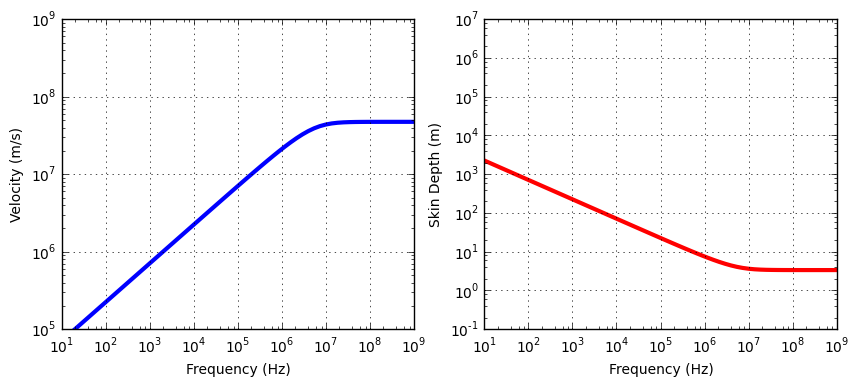

In [3]:
i = interact(WaveVelandSkindWidget, epsr=(1., 80., 3.), sigma=(-8., 2., 0.5))

## Step 3: Parametric field data fitting App for CMP survey

We move on treating field GPR data set, which was acquired near University of British Columbia, Canada. The first observed data set you will work with is a common midpoint survey. In this step, you will estimate velocity of the ground by adjusting the given parameters. 

Parameters given here:
- epsr: Relative permittivity for direct wave
- tinterp: intercept time for direct wave

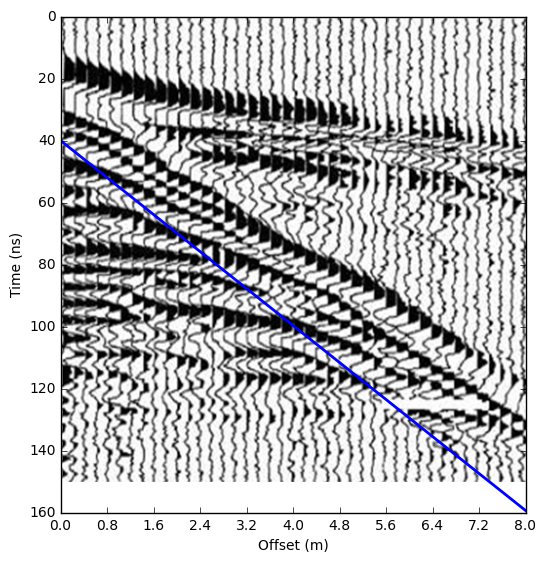

In [4]:
ifield = interact(PrimaryFieldWidget,  tinterp = (0, 80, 2), epsr = (1, 40, 1))

## Step 4: Field data fitting App for a profile line

The second data set you will work with is a common offset profile line of GPR data collected near UBC. There are two features in the data that you will fit: a pipe (using the red curve in the first plot below) and a concrete slab (using the blue curve in the second plot below). 


### Step 4a: A pipe model

Parameters given here:
- epsr: Relative permittivity of the background medium
- h: Distance from center of the pipe to the surface
- xc: Horizontal location of the pipe center
- r: radius of the pipe

<img src="pipemodel.png" width="500"></img>

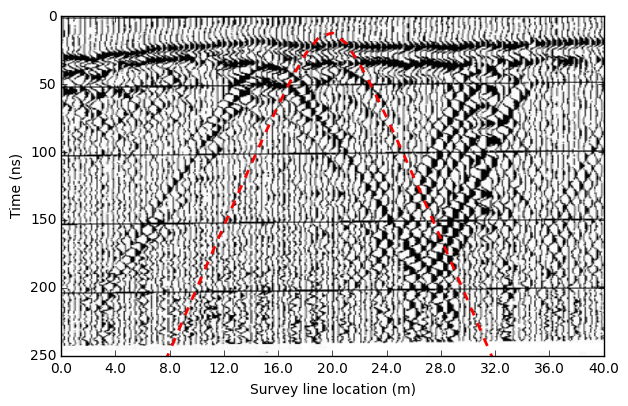

In [5]:
i = interact(PipeWidget, epsr = (0, 100, 1), h=(0.1, 2.0, 0.1), xc=(0., 40., 0.2), r=(0.1, 3, 0.1) )

### Step 4b: A slab model

Parameters given here:
- epsr: Relative permittivity of the background medium
- h: Distance from top boundary of concrete casing to the surface
- x1: horizontal location of left boundary of the concrete casing model
- x2: horizontal location of right boundary of the concrete casing model


<img src="slabmodel.png" width="500"></img>

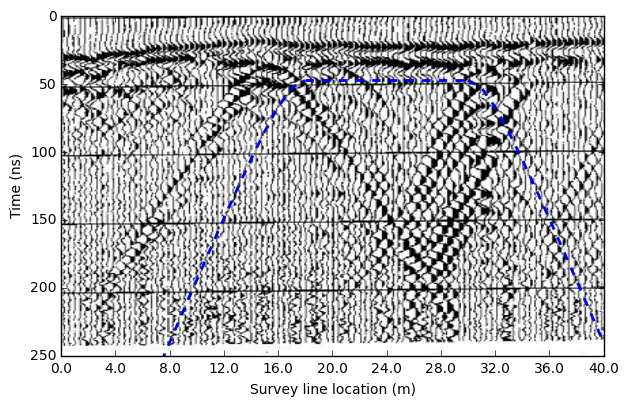

In [6]:
i = interact(WallWidget, epsr = (0, 100, 1), h=(0.1, 2.0, 0.1), x1=(1, 35, 1), x2=(20, 40, 1) )